In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
print(df.describe())

               Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000


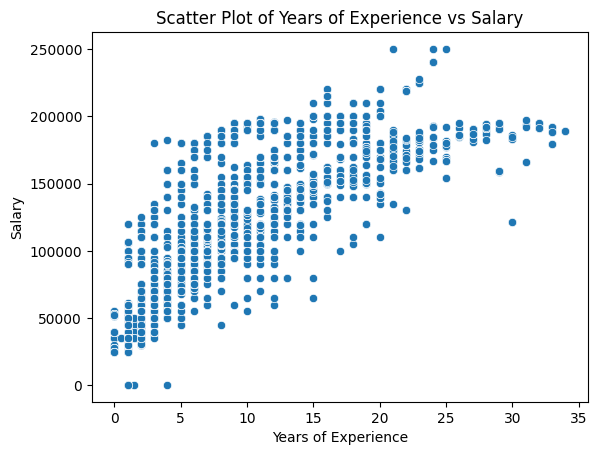

In [ ]:
sns.scatterplot(data=df, x='Years of Experience', y='Salary')
plt.title('Scatter Plot of Years of Experience vs Salary')
plt.show()

In [ ]:
# Checking for missing values
print('Missing Values:\n', df.isnull().sum())

Missing Values:
 Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [ ]:
df['Years of Experience'].fillna(df['Years of Experience'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)

/tmp/ipython-input-204199356.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Years of Experience'].fillna(df['Years of Experience'].mean(), inplace=True)
/tmp/ipython-input-204199356.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [ ]:
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df[['Years of Experience', 'Salary']])

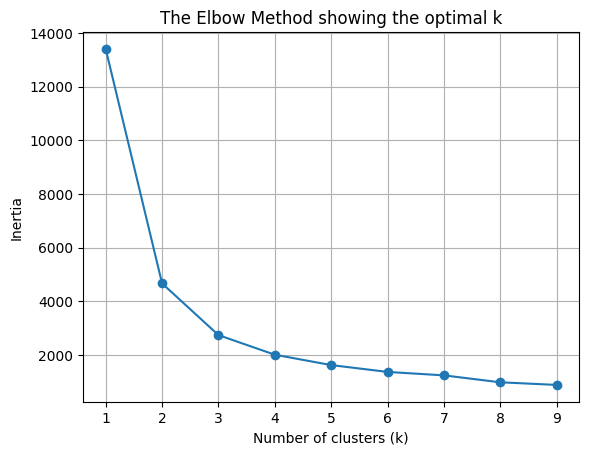

In [ ]:
inertia = []      # stands for mean distance
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.grid(True)
plt.show()

In [ ]:
# Assuming k=3 based on elbow plot
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

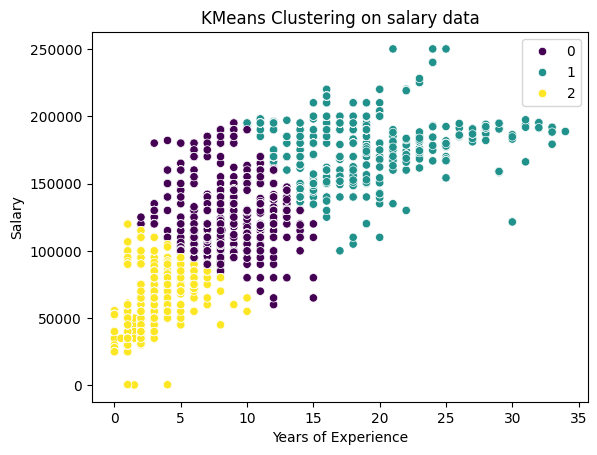

In [ ]:
sns.scatterplot(data=df, x='Years of Experience', y='Salary', hue='Cluster', palette='viridis')
plt.title('KMeans Clustering on salary data')
plt.legend()
plt.show()

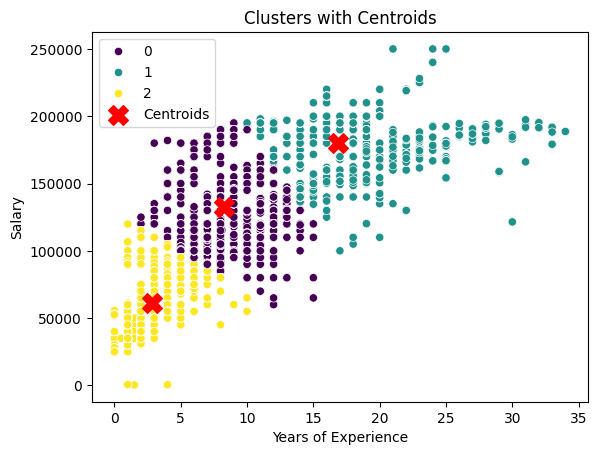

In [ ]:
# Get cluster centers in original scale
centroids_scaled = kmeans.cluster_centers_
centroids_original = scalar.inverse_transform(centroids_scaled)

# Plot with cluster centers
sns.scatterplot(data=df, x='Years of Experience', y='Salary', hue='Cluster', palette='viridis')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('Clusters with Centroids')
plt.legend()
plt.show()

In [ ]:
for i in range(3):    # change 3 to your selected k
    cluster = df[df['Cluster'] == i]
    print('\nCluster {i} Summary:')
    print(cluster[['Years of Experience', 'Salary']].describe())


Cluster {i} Summary:
       Years of Experience         Salary
count          2511.000000    2511.000000
mean              8.251806  132710.356760
std               2.567869   27111.837304
min               2.000000   60000.000000
25%               6.000000  110000.000000
50%               8.000000  130000.000000
75%              10.000000  150000.000000
max              15.000000  195000.000000

Cluster {i} Summary:
       Years of Experience         Salary
count          1548.000000    1548.000000
mean             16.871447  179938.557494
std               4.296044   20187.683501
min              10.000000  100000.000000
25%              14.000000  170000.000000
50%              16.000000  183848.000000
75%              19.000000  195000.000000
max              34.000000  250000.000000

Cluster {i} Summary:
       Years of Experience         Salary
count          2645.000000    2645.000000
mean              2.808885   61009.973157
std               1.701832   20972.438270
min       